In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [2]:
df = pd.read_csv("otto.csv")
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [3]:
df = df.dropna()
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [4]:
df = df[pd.to_numeric(df['id'], errors='coerce').notnull()]
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [5]:
df = df.loc[(df!=0).any(axis=1)]
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [6]:
label = preprocessing.LabelEncoder()
df['target']= label.fit_transform(df['target']) 
print(df['target'].unique())

[0 1 2 3 4 5 6 7 8]


In [7]:
X = df.drop(['id','target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [9]:
knn_y_pred = knn_classifier.predict(X_test)

In [10]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       398
           1       0.69      0.85      0.76      3264
           2       0.53      0.44      0.48      1549
           3       0.59      0.23      0.33       512
           4       0.95      0.97      0.96       569
           5       0.95      0.93      0.94      2855
           6       0.76      0.60      0.67       581
           7       0.90      0.89      0.89      1689
           8       0.84      0.86      0.85       959

    accuracy                           0.78     12376
   macro avg       0.75      0.70      0.71     12376
weighted avg       0.78      0.78      0.77     12376



In [11]:
rf = RandomForestClassifier(n_estimators = 80)
rf = rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)


In [12]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.41      0.55       398
           1       0.72      0.88      0.79      3264
           2       0.63      0.49      0.55      1549
           3       0.84      0.44      0.58       512
           4       0.98      0.96      0.97       569
           5       0.94      0.95      0.94      2855
           6       0.81      0.61      0.70       581
           7       0.86      0.94      0.90      1689
           8       0.85      0.87      0.86       959

    accuracy                           0.81     12376
   macro avg       0.83      0.73      0.76     12376
weighted avg       0.81      0.81      0.80     12376



In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)


In [14]:
print(classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.25      0.35      0.29       398
           1       0.66      0.65      0.66      3264
           2       0.42      0.25      0.31      1549
           3       0.21      0.50      0.30       512
           4       0.45      0.94      0.60       569
           5       0.95      0.78      0.86      2855
           6       0.43      0.50      0.46       581
           7       0.89      0.54      0.68      1689
           8       0.59      0.76      0.66       959

    accuracy                           0.62     12376
   macro avg       0.54      0.59      0.54     12376
weighted avg       0.67      0.62      0.63     12376



In [15]:
pwc = pd.DataFrame(knn_y_pred, columns=['knn'])
pwc['rf'] = rf_y_pred
pwc['gnb'] = gnb_y_pred
pwc

,knn,rf,gnb
0,1,1,1
1,6,6,3
2,5,5,5
3,5,5,5
4,5,5,5
...,...,...,...
12371,8,8,8
12372,5,5,5
12373,1,1,1
12374,1,1,4


<AxesSubplot:>

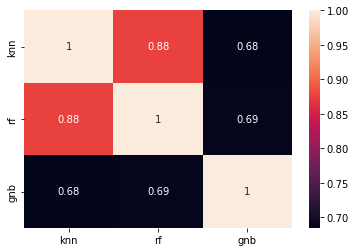

In [16]:
pwc = pwc.corr()
sns.heatmap(pwc, annot=True)

Observation and analysis:

For K-Nearest Neighbors model with 6 neighbors, its f1 score is 0.52 with 0.78 accuracy. For Random Forest model with 80 estimators, its f1 score is 0.55 with 0.81 accuracy. For Gaussian Naive Bayes model, its f1 score is 0.29 with 0.62 accuracy. From the heatmap above, the correlation for knn and random forest is 0.88, the correlation of knn and Gaussian Naive Bayes is 0.68 the correlation between Gaussian Naive Bayes and random forest is 0.69.